# Suplari Data Exercise

This notebook answers the following four questions: 

1. What are the top 10 suppliers for 2017 and how much is spent on each supplier?

2. Which business unit was the top spender so far in 2017?

3. Compare the top 10 suppliers in 2017 to the top suppliers in 2016

4. How many transactions were recorded for 2015, 2016, and 2017 respectively?

To do so, I used the datasets located in the `\Data` folder.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Load datasets

In [2]:
mapping_bu = pd.read_csv('Data/techtrades_bu.csv')
mapping_account = pd.read_csv('Data/techtrades_accounts.csv')
data2015 = pd.read_csv('Data/2015pcard_data.csv')
data2016 = pd.read_csv('Data/2016pcard_data.csv')
data2017 = pd.read_csv('Data/2017pcard_data.csv')

## 1. What are the top 10 suppliers for 2017 and how much is spent on each supplier?

### Exploring 2017 dataset columns

In [3]:
data2017.head(4)

,transactionid,amount,transactiondate,vendor,merchantcode,bu,account,ExpenseType,costcenter
0,17pcp8865,18.929075,7/10/2017,76,15100,100,8740,Building Suppliles,Corporate IT
1,17pcp17762,53.014500,6/11/2017,76,15100,100,8740,Building Suppliles,Corporate IT
2,17pcp154402,70.662625,7/29/2017,76,15100,100,8416,Car Rental,Corporate IT
3,17pcp155646,24.557775,5/27/2017,76,15100,100,8416,Car Rental,Corporate IT


In [4]:
data2017.vendor.unique()

array(['76', '01 BARTELL DRUGS', "025 IVAR'S SEATAC", ...,
       "LITTLE ANTHONY'S", "LONGO'S", 'UPEXPRESS.COM'], dtype=object)

In [5]:
with np.printoptions(threshold=np.inf):
    print(data2017.vendor.unique())

['76' '01 BARTELL DRUGS' "025 IVAR'S SEATAC" '1057 JESSIE'
 '32750 - BWI DAILY GARAGE' '3380 SLS LAS VEGAS' '443 N WABASH'
 '4TE*CULLIGAN OF ONTARIO' '51449 - 1616 SANSOM ST'
 '652 FLIGHT TERMINAL A' '7 ELEVEN STORE' '72711 - THE MAXWELL' '7-ELEVEN'
 '7TH AND PIKE GARAGE' '81411 - THE GROVE - SELF'
 '81577 - THE AMERICANA AT' '81787 - CALIFORNIA MART -'
 '82072 - 1600 SEVENTH AVE' '82636 - 100 N. LA CIENEGA'
 '85C BAKERY CAFE USA' '91 EXPRESS LANES REBILLS' '99 CENTS ONLY STORES'
 '99228 - 149 NEWBURY STREE' '99-CENTS-ONLY' 'A&W'
 'A-1 AIRLINE TAXI AND VAN' 'A4U' 'AA INFLIGHT VISA FACET'
 'AAROPORT LIMOUSINE SER' 'ABC COCINA' 'ABC DISPOSAL SYSTEMS INC'
 'ABC HAWAII' 'ABC KITCHEN' 'ABM ONSITE THE BLOC'
 'ABM ONSITE WESTFIELD MALL' 'ABM PARKING LIBERTY CENTE'
 'ABM PARKING SAN JOSE AIRP' 'ABM PARKING SHOPS AT MIDT'
 'ABSOLUT DIESEL REPAIR LL' 'ABSOPURE WATER COMPANY' 'AC MOORE STR'
 'ACCENTS' 'ACCESS' 'ACCESS INFO MGMT' 'ACE HOTEL DOWNTOWN LA'
 'ACE HOTEL DOWNTOWN LA F&B' 'ACE HOTEL NEW 

We have seven columns:
- `transactionid`: the id of the transaction.
- `amount`: the cost of the transaction.
- `transactiondate`: the date of the transaction.
- `vendor`: name of the vendor
- `merchantcode`: a code specific to each vendor. 
- `bu`: bussiness unit of the vendor that made the transaction.
- `account`: name of the vendor account (e.g., Professional Services, Advertisement).
- `ExpenseType`: the nature of the transaction.
- `costcenter`: cost center (a department within a company) of the vendor. 

In [6]:
data2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189858 entries, 0 to 189857
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   transactionid    189858 non-null  object 
 1   amount           189858 non-null  float64
 2   transactiondate  189858 non-null  object 
 3   vendor           189858 non-null  object 
 4   merchantcode     189858 non-null  int64  
 5   bu               189858 non-null  int64  
 6   account          189858 non-null  int64  
 7   ExpenseType      189858 non-null  object 
 8   costcenter       189858 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 13.0+ MB


- `transactiondate` is saved as an object. If needed, we could transform it later to a datetime object.
- Also, `merchantcode`, `bu`, and `account` are stored as an `int64` but they should be objects. We have mappings for the last two, so let's use their text names.
- Finally, `costcenter` also has a mapping, but it's almost identical to the values we currently have. 


In [7]:
# Change type of merchant code
data2017.merchantcode = data2017.merchantcode.astype('object')

In [8]:
mapping_bu.head()

,buid,name
0,100,"Techtrades, Inc. (HQ)"
1,110,Techtrades LTD (UK)
2,120,Techtrades NK (Japan)
3,200,"Zeus Banking, Inc."


In [9]:
#Mapping bu
mapping_bu_dict = mapping_bu.set_index('buid')['name'].to_dict()
data2017.bu = data2017.bu.map(mapping_bu_dict, na_action='ignore')

In [10]:
len(mapping_account)

41

In [11]:
mapping_account.head()

,accountcode,accountname
0,1250,Employee Receivables
1,1500,Other Current Assets
2,1540,Prepaid Vendor Amounts
3,1590,Other Prepaid Expenses
4,6150,Freight Cost


In [12]:
mapping_account.tail()

,accountcode,accountname
36,8645,IT Maintenance
37,8650,Equipment Mantenance and Repair
38,8720,Building Maintenance
39,8730,Property Taxes
40,8740,Building Suppliles


In [13]:
#Mapping account
mapping_account_dict = mapping_account.set_index('accountcode')['accountname'].to_dict()
data2017.account = data2017.account.map(mapping_account_dict, na_action='ignore')

In [14]:
# Check dataset again
data2017.head(4)

,transactionid,amount,transactiondate,vendor,merchantcode,bu,account,ExpenseType,costcenter
0,17pcp8865,18.929075,7/10/2017,76,15100,"Techtrades, Inc. (HQ)",Building Suppliles,Building Suppliles,Corporate IT
1,17pcp17762,53.014500,6/11/2017,76,15100,"Techtrades, Inc. (HQ)",Building Suppliles,Building Suppliles,Corporate IT
2,17pcp154402,70.662625,7/29/2017,76,15100,"Techtrades, Inc. (HQ)",Car Rental,Car Rental,Corporate IT
3,17pcp155646,24.557775,5/27/2017,76,15100,"Techtrades, Inc. (HQ)",Car Rental,Car Rental,Corporate IT


In [15]:
data2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189858 entries, 0 to 189857
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   transactionid    189858 non-null  object 
 1   amount           189858 non-null  float64
 2   transactiondate  189858 non-null  object 
 3   vendor           189858 non-null  object 
 4   merchantcode     189858 non-null  object 
 5   bu               189858 non-null  object 
 6   account          189858 non-null  object 
 7   ExpenseType      189858 non-null  object 
 8   costcenter       189858 non-null  object 
dtypes: float64(1), object(8)
memory usage: 13.0+ MB


### Exploring null values

In [16]:
data2017.isnull().sum()

transactionid      0
amount             0
transactiondate    0
vendor             0
merchantcode       0
bu                 0
account            0
ExpenseType        0
costcenter         0
dtype: int64

No missing values! Great!

### Checking for duplicate ids

In [17]:
data2017.transactionid.duplicated().sum() # The result of the duplicated() is a boolean Series, and we can add them up to count the number of duplicates. Behind the theme, True get converted to 1 and False get converted to 0, then it adds them up.

0

No duplicate ids. Cool.

### Checking the amount column

In [18]:
data2017.amount.describe()

count    189858.000000
mean        254.479514
std        4622.354189
min      -20147.987750
25%           8.281412
50%          28.325357
75%         107.984436
max      765407.166000
Name: amount, dtype: float64

I guess that positive values refer to payments made to a supplier, and negative values to deposits made by suppliers. If that is the case, we should treat both sets of values separately. 

In [22]:
data2017_positives = data2017.loc[data2017.amount >= 0]
data2017_negatives = data2017.loc[data2017.amount < 0]

In [25]:
print('Positives: ', len(data2017_positives))
print('Negatives: ', len(data2017_negatives))

Positives:  187370
Negatives:  2488


#### Exploring positive values

In [27]:
data2017_positives.describe()

,amount
count,187370.000000
mean,260.834519
std,4651.473131
min,0.001870
25%,8.796129
50%,29.370687
75%,110.103262
max,765407.166000


It seems that we have one or more clear outliers, since the highest values is many standard deviations from the mean. Also, the mean is higher than 75% of our values. 

In [52]:
percentiles = list(range(10, 100, 5))
for percentile in percentiles:
    print(f'Percentile {percentile}:', data2017_positives.amount.quantile(percentile/100))

Percentile 10: 3.19022
Percentile 15: 4.6937
Percentile 20: 6.522373000000003
Percentile 25: 8.796129375
Percentile 30: 11.45375
Percentile 35: 14.57478
Percentile 40: 18.472795
Percentile 45: 23.258125
Percentile 50: 29.3706875
Percentile 55: 37.32982825000001
Percentile 60: 48.3111695
Percentile 65: 62.39801975
Percentile 70: 81.8125
Percentile 75: 110.1032625
Percentile 80: 151.2395225000002
Percentile 85: 222.0625
Percentile 90: 356.84322685000006
Percentile 95: 684.7170962499999


Yes, there are several outliers that are skewing the distribution, since the 95th percentile is less than 700. 

In [54]:
sns.set_theme()

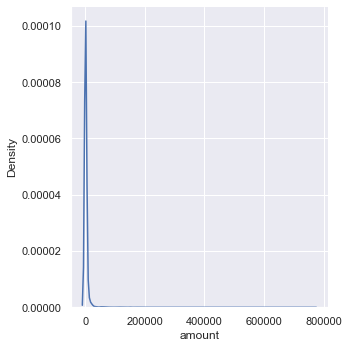

In [87]:
sns.displot(round(data2017_positives.loc[data2017_positives.amount > 700, 'amount']), kind="kde");

There are so few values with high amounts that they do not even appear in this graph. Let's try with another one that uses values higher than 20,000.

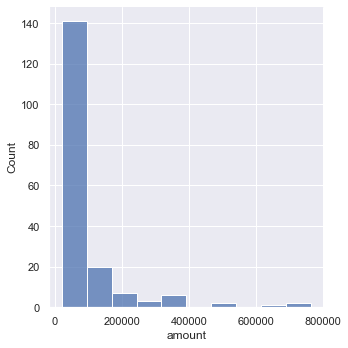

In [85]:
sns.displot(round(data2017_positives.loc[data2017_positives.amount > 20_000, 'amount']), bins=10);

Our graph confirms that there are very few rows (less than 10) with a very high amount value. 

#### Exploring negative values

In [90]:
data2017_negatives.describe()

,amount
count,2488.000000
mean,-224.112625
std,893.094370
min,-20147.987750
25%,-144.379194
50%,-37.585317
75%,-9.846251
max,-0.000935


Just as before, we seem to have a couple of outliers, since the mean is higher (or, in this case with negative values, lower) than the mean.

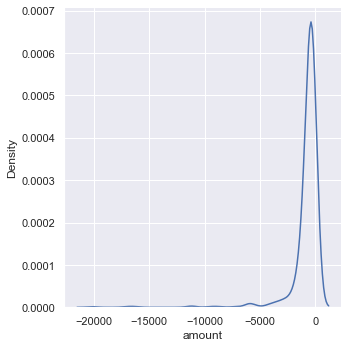

In [91]:
sns.displot(round(data2017_negatives.loc[data2017_negatives.amount < -145, 'amount']), kind="kde");

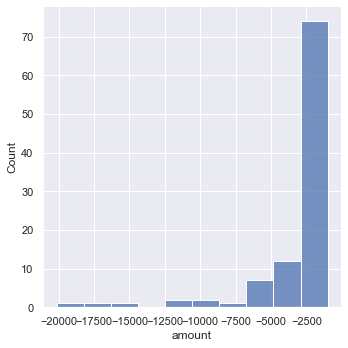

In [96]:
sns.displot(round(data2017_negatives.loc[data2017_negatives.amount < -1000, 'amount']), bins=10);

Yes, again we seem to have some values that skew the distribution. 

### Cleaning the vendor column

We should also check whether we have duplicate values in the vendor column. This is necessary because a vendor's name could be listed, for example, in lowercase and in uppercase.

In [100]:
# Apply uppercase
data2017.vendor.str.upper()

0                     76
1                     76
2                     76
3                     76
4                     76
               ...      
189853       ZIPCAR INC.
189854       ZIPCAR INC.
189855             ZOES 
189856    ZORO TOOLS INC
189857    ZORO TOOLS INC
Name: vendor, Length: 189858, dtype: object

## 2. Which business unit was the top spender so far in 2017?

## 3. Compare the top 10 suppliers in 2017 to the top suppliers in 2016.

## 4. How many transactions were recorded for 2015, 2016, and 2017 respectively?

We already have cleaned the 2017 dataset, so the answer is easy to find:

In [101]:
len(data2017)

189858

Let's explore and clean the 2015 dataset.